# Calculate simple linear regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
x = [1,2,3,4,7,8,9,10, 11, 12, 10, 9, 9, 10, 12, 11,13,14,15,17,18,19,20,21,22]
y = [3,4,5,6,5,9,10,11,14,13,15, 11, 12, 11, 13, 15,15,16,17,20,16,21,23,24,25]
x=np.array(x)
y=np.array(y)

def estimate_coef(x,y):
    #number of observations
    n=np.size(x)
    
    #mean of x & y vector
    m_x,m_y=np.mean(x),np.mean(y)
    
    #Calculating cross deviation and deviation of x
    SS_xy=np.sum(y*x)-n*m_y*m_x
    SS_xx=np.sum(x*x)-n*m_x*m_x
    
    #Regression coefficient
    b1= SS_xy/SS_xx
    b0=m_y-b1*m_x
    return(b0,b1)

def plot_regression_line(x,y,b):
    plt.scatter(x,y,color="m",marker="o",s=30)
    
    y_pred=b[0]+b[1]*x
    
    #plotting regression line
    plt.plot(x,y_pred,color="g")

    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    
def main():
    
    x = np.array([1,2,3,4,7,8,9,10, 11, 12, 10, 9, 9, 10, 12, 11,13,14,15,17,18,19,20,21,22])
    y = np.array([3,4,5,6,5,9,10,11,14,13,15, 11, 12, 11, 13, 15,15,16,17,20,16,21,23,24,25])
    
    b=estimate_coef(x,y)
    print(b[0])
    print(b[1])
    
    plot_regression_line(x,y,b)
    
main()    

In [ ]:
#let's do prediction
y=1.52+1.031*2
print(y)

# Using dataset - To predict Salary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
df_sal=pd.read_csv(r"C:\Users\ronak\Downloads\Stat\Salary_Data.csv")
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df_sal.describe()

# Check for Linear Relationship:
Ensure that there is a linear relationship between the independent variable (experience) and the dependent variable (salary). You can do this by plotting a scatter plot. 
You can also use correlation coefficients.

C:\Users\ronak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


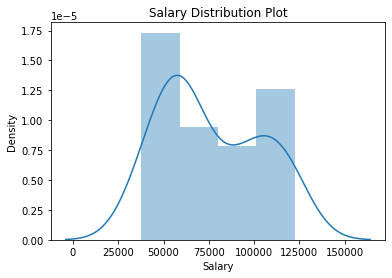

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [4]:
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

correlation = df_sal.corr()
print(correlation)

In [ ]:
plt.scatter(df_sal['YearsExperience'],df_sal['Salary'],color='lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
#splitting variable into independent and dependent variable
x=df_sal.iloc[:,:1] #Independent
y=df_sal.iloc[:,1:] #Dependent

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred_test=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

# Check for Homoscedasticity:
The variance of the residuals (errors) should be constant. 
Plotting residuals vs. fitted values can help check this assumption.

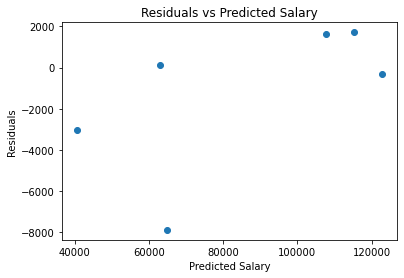

In [10]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()

# Check for Normality of Residuals:
Residuals should be normally distributed. You can use a Q-Q plot to check this.

C:\Users\ronak\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


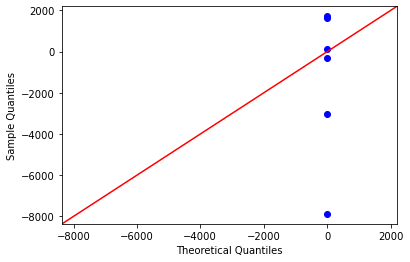

In [11]:
import statsmodels.api as sm
sm.qqplot(residuals, line ='45')
plt.show()

# Check for Independence of Errors:
Ensure that the residuals are independent of each other. You can use the Durbin-Watson test for this.

In [12]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: [1.70570886]


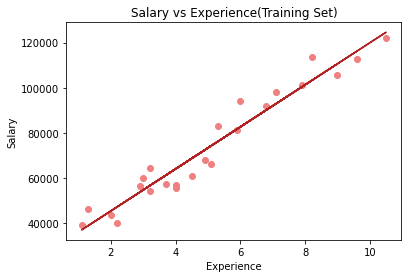

In [13]:
#prediction on training set
plt.scatter(x_train,y_train,color='lightcoral')
plt.plot(x_train,y_pred_train,color='firebrick')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


# So this is the equation to predict value

Salary=26780.099+9312.575*(Experience)

In [ ]:
Salary=26780.099+9312.575*(4)
print(Salary)

# Performance Metrics:
Evaluate your model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 12823412.298126562
Mean Absolute Error: 2446.1723690465064
R-squared: 0.988169515729126


# Learning Curves:
Plot learning curves to see if your model suffers from high bias or high variance.

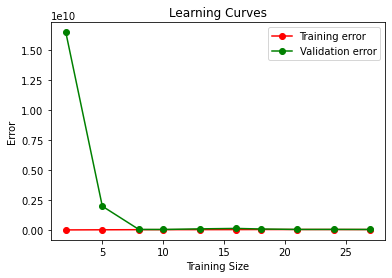

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(regressor, x, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')

plt.xlabel('Training Size')
plt.ylabel('Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()